**Trabalhando com Planilhas do Excel - Aula5**

Criar relátorio de vendas em cada Cidade

In [ ]:
from google.colab import drive


In [ ]:
#importando a biblioteca
import pandas as pd

In [ ]:
#leitura dos Arquivos /content/Salvador.xlsx

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")


In [ ]:
#verificando
df5.head()


,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [ ]:
#juntando todos arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
81,Recife,2019-01-01,36.52,982,8
7,Aracaju,2019-01-01,172.22,1522,6
73,Natal,2018-01-05,773.00,852,2
80,Natal,2018-05-23,264.00,852,3
51,Recife,2019-01-01,146.95,982,2


In [ ]:
#verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#alterando o tipo de dado de colua LojaID sendo um número não vai ser usado para calculos
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**Tratando valores faltantes**

In [ ]:
#consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#substituindo os valores nulos pela média
# df["Vendas"].fillna(df["Vendas"]).mean(), inplace=True)

In [ ]:
#media de vendas
df["Vendas"].mean()

122.61180089485458

In [ ]:
#substituindo os valores nulos por zero
# df["Vendas"].fillna(0, inplace = True)

In [ ]:
# Apagendo as linhas com valores nulos
# df.dropna(inplace=True)

In [ ]:
#apagando as linhas com valores nulos som base apenas em 1 coluna
# dfdropna(subset=["Vendas"], inplace=True)

In [ ]:
#removendo linhas que estejam faltantes em todas as colunas
#df.dropna(how="all", inplace=True)

**Criando colunas novas**

In [ ]:
#criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#exemplo se não tivesse Qtde
#df["Receita"/"Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
#retorna a maior receita
df["Receita"].max()

3544.0

In [ ]:
#menor receita
df["Receita"].min()

3.34

In [ ]:
#nlargest top3 de vendas as maiores receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#nsmallest as 3 piores receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
#agrupamento por cidade por receita
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


# **Trabalhando com datas**

In [ ]:
# transformando a coluna da data em tipo inteiro
df["Data"]=df["Data"].astype("Int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [ ]:
#transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
# Agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando a coluna com o ano
df["Ano_Venda"]= df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
224,Salvador,2019-01-02,178.30,1035,3,534.90,2019
162,Salvador,2019-01-02,23.08,1036,2,46.16,2019
35,Aracaju,2018-01-01,40.60,1520,3,121.80,2018
83,Recife,2019-01-01,143.61,983,6,861.66,2019
1,Fortaleza,2019-01-01,115.61,1002,3,346.83,2019


In [ ]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
33,Fortaleza,2019-01-01,19.56,1005,1,19.56,2019,1,1
56,Natal,2018-03-02,704.00,852,4,2816.00,2018,3,2
9,Salvador,2019-01-01,127.92,1036,1,127.92,2019,1,1
60,Recife,2019-01-01,37.97,983,1,37.97,2019,1,1
16,Natal,2018-07-01,298.00,854,3,894.00,2018,7,1


In [ ]:
#retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# calcular a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
64,Aracaju,2018-01-01,21.00,1523,5,105.00,2018,1,1,0 days
123,Natal,2019-01-02,127.45,1036,3,382.35,2019,1,2,366 days
76,Salvador,2019-01-01,39.51,1035,3,118.53,2019,1,1,365 days
85,Aracaju,2018-01-01,15.17,1521,1,15.17,2018,1,1,0 days
221,Natal,2019-01-02,142.23,1035,2,284.46,2019,1,2,366 days


In [ ]:
# criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
166,Natal,2019-01-02,111.72,1035,3,335.16,2019,1,2,366 days,1
44,Aracaju,2018-01-01,11.42,1520,5,57.10,2018,1,1,0 days,1
106,Recife,2019-01-01,30.46,982,3,91.38,2019,1,1,365 days,1
45,Salvador,2019-01-01,175.25,1035,3,525.75,2019,1,1,365 days,1
10,Recife,2019-01-01,38.51,982,8,308.08,2019,1,1,365 days,1


In [ ]:
#filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1
124,Recife,2019-03-02,47.98,983,7,335.86,2019,3,2,425 days,1
122,Recife,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,2019,3,2,425 days,1
8,Natal,2019-03-27,667.00,852,4,2668.00,2019,3,27,450 days,1
134,Salvador,2019-03-02,125.90,1036,1,125.90,2019,3,2,425 days,1
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
115,Recife,2019-03-02,12.23,981,3,36.69,2019,3,2,425 days,1


# **Visualização de dados - Aula7**

In [ ]:
df["LojaID"] = df["LojaID"].astype("int64")

In [ ]:
df.dtypes

Cidade                      object
Data                datetime64[ns]
Vendas                     float64
LojaID                       int64
Qtde                         int64
Receita                    float64
Ano_Venda                    int64
mes_venda                    int64
dia_venda                    int64
diferenca_dias     timedelta64[ns]
trimestre_venda              int64
dtype: object

In [ ]:
#metodo values_counts --do maior para menor
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

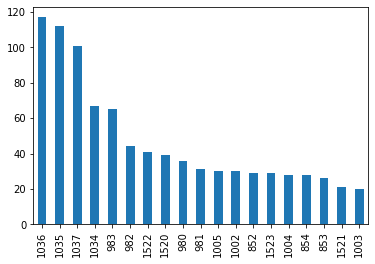

In [ ]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar() 

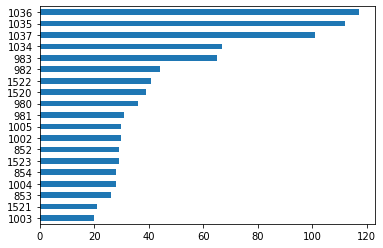

In [ ]:
#gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

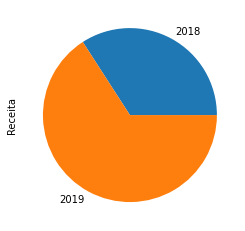

In [ ]:
#grafico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [ ]:
#total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

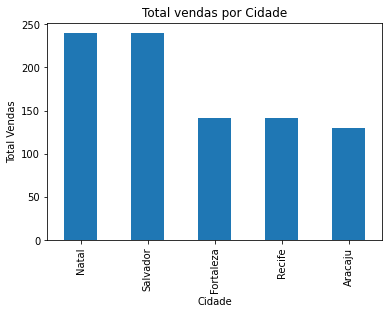

In [ ]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

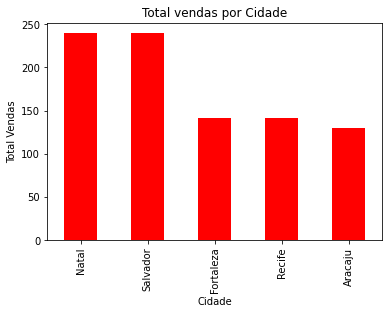

In [ ]:
# alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#alterando o estilo
plt.style.use("ggplot")

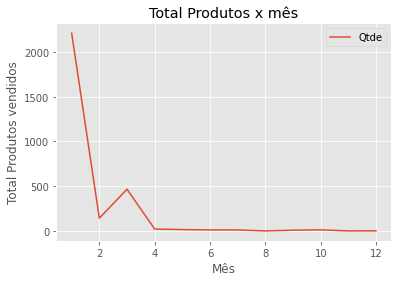

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos x mês" )
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend();

In [ ]:
#Vendas por mes
df.groupby(df["mes_venda"])["Qtde"].sum()


mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

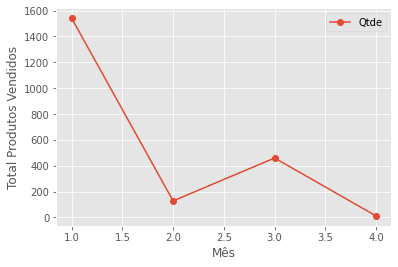

In [ ]:
# total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

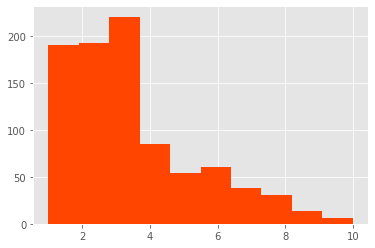

In [ ]:
#histograma
plt.hist(df["Qtde"], color="orangered");

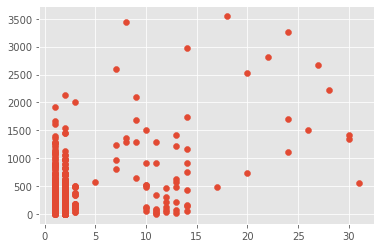

In [ ]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);

In [ ]:
#salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.legend()
plt.savefig("grafico Qtde x MES.png")